# **Students' Personal Information**

---
### `Ioanna Apostolopoulou - 1115201600006`

---

### `Georgios Pikios - 1115201900357`

---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Changing directories in order to access datasets and files stored in specific locations

In [2]:
import os

# changing directory to 'Project_01'
os.chdir("/content/drive/MyDrive/Data_Mining_24/Project_02")

### Getting transformers

In [3]:
!pip install transformers
!pip install tensorflow
!pip install torch torchvision torchaudio
!pip install langdetect
!pip install tf-keras

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## First, we import all the necessary libraries for our project

In [2]:
import pandas as pd
import numpy as np
import string
import sys
import re

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# working with pipelines
from transformers import pipeline

# for the second part of the assignment
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import cosine_similarity

# working with text data
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

import random

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **First Part: ✨Study over time**✨

In [5]:
# defining a list of years
year_list = ["2019", "2023"]
# defining a list of months for each year
months_list_2019 = ["febrouary", "march", "april"]
months_list_2023 = [ "march" , "june", "september" ]

# initializing an empty dictionary
df_reviews_dictionary = {}
# looping through each year
for year in year_list:
  if year == "2019":
    for month in months_list_2019:
      # reading the review CSV file for each month
      df = pd.read_csv(f"data/2019/{month}/reviews.csv")
      # storing the dataframe in the dictionary with a key
      df_reviews_dictionary[f"df_2019_{month}_reviews"] = df
  elif year == "2023":
    for month in months_list_2023:
      df = pd.read_csv(f"data/2023/{month}/reviews.csv")
      df_reviews_dictionary[f"df_2023_{month}_reviews"] = df

duplicates in comments

In [6]:
for df_name in df_reviews_dictionary:
  df_reviews_dictionary[df_name] = df_reviews_dictionary[df_name].drop_duplicates(subset=['comments']).dropna(subset=['comments'])

In [7]:
#checking if the duplicates where deleted
for df_name in df_reviews_dictionary:
    print(f"in {df_name} dataframe where found ", df_reviews_dictionary[df_name]['comments'].duplicated().sum() ,"duplicates out of ", df_reviews_dictionary[df_name]['comments'].count(), "data points")
    print(f"in {df_name} dataframe where found ", df_reviews_dictionary[df_name]['comments'].isna().sum() ,"NaN or null values \n\n")

in df_2019_febrouary_reviews dataframe where found  0 duplicates out of  272439 data points
in df_2019_febrouary_reviews dataframe where found  0 NaN or null values 


in df_2019_march_reviews dataframe where found  0 duplicates out of  275473 data points
in df_2019_march_reviews dataframe where found  0 NaN or null values 


in df_2019_april_reviews dataframe where found  0 duplicates out of  282769 data points
in df_2019_april_reviews dataframe where found  0 NaN or null values 


in df_2023_march_reviews dataframe where found  0 duplicates out of  521148 data points
in df_2023_march_reviews dataframe where found  0 NaN or null values 


in df_2023_june_reviews dataframe where found  0 duplicates out of  561114 data points
in df_2023_june_reviews dataframe where found  0 NaN or null values 


in df_2023_september_reviews dataframe where found  0 duplicates out of  561114 data points
in df_2023_september_reviews dataframe where found  0 NaN or null values 




In [8]:
for key_name in df_reviews_dictionary:
    print("the name of the key of the dictionary: ", key_name, "\n\n")
    df_reviews_dictionary[key_name]['comments'] = df_reviews_dictionary[key_name]['comments'].apply(lambda x: str(x) if not isinstance(x, str) else x) #making sure all the comments are strings

the name of the key of the dictionary:  df_2019_febrouary_reviews 


the name of the key of the dictionary:  df_2019_march_reviews 


the name of the key of the dictionary:  df_2019_april_reviews 


the name of the key of the dictionary:  df_2023_march_reviews 


the name of the key of the dictionary:  df_2023_june_reviews 


the name of the key of the dictionary:  df_2023_september_reviews 




In [12]:
import pandas as pd
from langdetect import detect, LangDetectException
import random

sample_size = 100

# Create lists to hold the sampled dataframes for each year
sampled_dataframes_2019 = []
sampled_dataframes_2023 = []

# Function to sample English comments from a given DataFrame
def sample_english_comments(df, sample_size):
    sampled_df = pd.DataFrame(columns=df.columns)
    for index, row in df.iterrows():
        if len(sampled_df) >= sample_size:
            break
        comment = row['comments']
        if len(comment) > 500:
            continue
        try:
            if detect(comment) == 'en':
                seed_value = random.randint(0, 900)
                if seed_value % 2 == 0:
                    sampled_df = sampled_df._append(row, ignore_index=True)
        except LangDetectException as e:
            print(f"Language detection failed for '{comment}': {e}")
    return sampled_df

# Loop through the dictionary keys and process each DataFrame
for df_name in df_reviews_dictionary:
    df = df_reviews_dictionary[df_name]
    year = df_name.split('_')[1]

    sampled_df = sample_english_comments(df, sample_size)

    if '2019' in df_name:
        sampled_dataframes_2019.append(sampled_df)
    elif '2023' in df_name:
        sampled_dataframes_2023.append(sampled_df)

# Combine the sampled DataFrames for each year
sampled_df_2019_reviews = pd.concat(sampled_dataframes_2019, ignore_index=True)
sampled_df_2023_reviews = pd.concat(sampled_dataframes_2023, ignore_index=True)

# Checking if lists have the expected number of elements
print(len(sampled_dataframes_2019), "\n\n")
print(len(sampled_dataframes_2023))

# Checking if the full sampled DataFrames have the expected number of rows and columns
print(sampled_df_2019_reviews.shape[0], "\n\n")
print(sampled_df_2023_reviews.shape[0], "\n\n")


Language detection failed for '!!!': No features in text.
Language detection failed for '!!!': No features in text.
Language detection failed for ',': No features in text.
Language detection failed for ',': No features in text.
Language detection failed for '!!!': No features in text.
Language detection failed for ',': No features in text.
Language detection failed for '!!!': No features in text.
3 


3
300 


300 




In [35]:
import numbers

url_pattern = re.compile(r'https?://\S+|www\.\S+')

emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)

emoticon_pattern = r'[:;=8][-o*\'`^]?[)\]dD\}>]|[(:;=8][-o*\'`^]?[(\[{<]|<3|:P|:p|:O|:o|:X|:x|:S|:s'

stop_words = set(stopwords.words('english'))

# Function to preprocess a comment
def preprocess_comment(comment):

    if isinstance(comment, numbers.Number):
        comment = str(comment)

    # Convert to lowercase
    comment = comment.lower()
    comment = re.sub(emoticon_pattern, '', comment)
    # Remove URLs
    comment = url_pattern.sub('', comment)
    # Remove emojis and emoticons
    comment = emoji_pattern.sub('', comment)
    # Remove punctuation marks except exclamation mark
    comment = ''.join([char if char == '!' or char not in string.punctuation else ' ' for char in comment])
    # Tokenize the comment
    tokens = nltk.word_tokenize(comment)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    cleaned_comment = ' '.join(tokens)

    return cleaned_comment


# Apply the function to each comment
sampled_df_2019_reviews['comments'] = sampled_df_2019_reviews['comments'].apply(preprocess_comment)
sampled_df_2023_reviews['comments'] = sampled_df_2023_reviews['comments'].apply(preprocess_comment)

print(sampled_df_2019_reviews.head(), "\n\n")
print(sampled_df_2023_reviews.head())

  listing_id        id        date reviewer_id reviewer_name  \
0      10595    271535  2011-05-20      189305        Pamela   
1      10595   4678609  2013-05-20     2635427         Ahmet   
2      10595  58112024  2015-12-31    52248367     Ευαγγελια   
3      10988   4996723  2013-06-06     2684185      Nicholas   
4      10988  12508543  2014-05-04     1189558        Alyona   

                                            comments neighbourhood  
0  apartment wonderful fully equiped beautiful de...           NaN  
1  manos good host kind helpful apartments spacio...           NaN  
2  apartment nice clean owner helpful help amenit...           NaN  
3  manos exceptionally wonderful host went way as...           NaN  
4  mr manos extremely helpful nice person waiting...           NaN   


  listing_id        id        date reviewer_id reviewer_name  \
0      10595   4678609  2013-05-20     2635427         Ahmet   
1    1708578  12403520  2014-05-01    12177872         Vicky   
2    1

In [36]:
#sentiment analysis
classifier = pipeline("text-classification", model="j-hartmann/sentiment-roberta-large-english-3-classes", return_all_scores=True)

fully_sampled_2019_comments_list = sampled_df_2019_reviews['comments'].tolist()
fully_sampled_2023_comments_list = sampled_df_2023_reviews['comments'].tolist()

classifier_res_2019 = classifier(fully_sampled_2019_comments_list)
classifier_res_2023 = classifier(fully_sampled_2023_comments_list)

Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
c:\Users\user\anaconda3\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.

In [37]:
# Creating DataFrame for sentiment results
sentiments_2019 = []
for res in classifier_res_2019:
    max_score = max(res, key=lambda x: x['score'])
    sentiments_2019.append(max_score['label'])

sentiments_2023 = []
for res in classifier_res_2023:
    max_score = max(res, key=lambda x: x['score'])
    sentiments_2023.append(max_score['label'])

# Create DataFrame with a single column named 'score'
df_sentiment_2019 = pd.DataFrame(sentiments_2019, columns=['sentiment'])
df_sentiment_2023 = pd.DataFrame(sentiments_2023, columns=['sentiment'])

print(df_sentiment_2019, "\n\n")
print(df_sentiment_2023)

    sentiment
0    positive
1    positive
2    positive
3    positive
4    positive
..        ...
295  positive
296  positive
297  positive
298  positive
299  positive

[300 rows x 1 columns] 


    sentiment
0    positive
1    positive
2    positive
3    positive
4    positive
..        ...
295  positive
296  positive
297  positive
298  positive
299  positive

[300 rows x 1 columns]


In [38]:
import pandas as pd

# Δημιουργία ενός DataFrame για τα αρχικά δεδομένα των σχολίων και της ημερομηνίας
initial_comments_2019 = pd.DataFrame(fully_sampled_2019_comments_list, columns=['comments'])
initial_comments_2019['date'] = [row['date'] for _, row in sampled_df_2019_reviews.iterrows()]  # Προσθήκη της στήλης date

# Προσθήκη αναγνωριστικού ID στα αρχικά δεδομένα
initial_comments_2019['id'] = initial_comments_2019.index

# Δημιουργία μιας λίστας με τα συναισθήματα από το classifier_res_2019
sentiments_2019 = [max(res, key=lambda x: x['score'])['label'] for res in classifier_res_2019]

# Προσθήκη της στήλης sentiment στο DataFrame
initial_comments_2019['sentiment'] = sentiments_2019

# Δημιουργία του τελικού DataFrame με τις στήλες id, date, comments, sentiment
final_df_2019 = initial_comments_2019[['id', 'date', 'comments', 'sentiment']]

# Έλεγχος του τελικού DataFrame
print(final_df_2019.head())

# Εκτύπωση του αριθμού των negative, positive και neutral σχολίων
sentiment_counts = final_df_2019['sentiment'].value_counts()
print("Sentiment counts:\n", sentiment_counts)

##############################################################################################################
# Δημιουργία ενός DataFrame για τα αρχικά δεδομένα των σχολίων και της ημερομηνίας
initial_comments_2023 = pd.DataFrame(fully_sampled_2023_comments_list, columns=['comments'])
initial_comments_2023['date'] = [row['date'] for _, row in sampled_df_2023_reviews.iterrows()]  # Προσθήκη της στήλης date

# Προσθήκη αναγνωριστικού ID στα αρχικά δεδομένα
initial_comments_2023['id'] = initial_comments_2023.index

# Δημιουργία μιας λίστας με τα συναισθήματα από το classifier_res_2023
sentiments_2023 = [max(res, key=lambda x: x['score'])['label'] for res in classifier_res_2023]

# Προσθήκη της στήλης sentiment στο DataFrame
initial_comments_2023['sentiment'] = sentiments_2023

# Δημιουργία του τελικού DataFrame με τις στήλες id, date, comments, sentiment
final_df_2023 = initial_comments_2023[['id', 'date', 'comments', 'sentiment']]

# Έλεγχος του τελικού DataFrame
print(final_df_2023.head())

# Εκτύπωση του αριθμού των negative, positive και neutral σχολίων
sentiment_counts = final_df_2023['sentiment'].value_counts()
print("Sentiment counts:\n", sentiment_counts)


   id        date                                           comments sentiment
0   0  2011-05-20  apartment wonderful fully equiped beautiful de...  positive
1   1  2013-05-20  manos good host kind helpful apartments spacio...  positive
2   2  2015-12-31  apartment nice clean owner helpful help amenit...  positive
3   3  2013-06-06  manos exceptionally wonderful host went way as...  positive
4   4  2014-05-04  mr manos extremely helpful nice person waiting...  positive
Sentiment counts:
 sentiment
positive    281
neutral      15
negative      4
Name: count, dtype: int64
   id        date                                           comments sentiment
0   0  2013-05-20  manos good host kind helpful apartments spacio...  positive
1   1  2014-05-01  angeliki great host friend really enjoyed stay...  positive
2   2  2014-06-12  little room perfect suitable size great one pe...  positive
3   3  2014-11-04  aggeliki super kind excellent host help anythi...  positive
4   4  2015-06-30  angeliki 

In [39]:
# Φιλτράρισμα των γραμμών με negative και neutral sentiment
negative_neutral_df_2019 = final_df_2019[final_df_2019['sentiment'].isin(['negative', 'neutral'])]

# Δειγματοληψία 150 γραμμών με positive sentiment
positive_df_2019 = final_df_2019[final_df_2019['sentiment'] == 'positive'].sample(n=200, random_state=42)

# Συνδυασμός των δύο DataFrames
combined_df_2019 = pd.concat([negative_neutral_df_2019, positive_df_2019], ignore_index=True)

# Έλεγχος του τελικού DataFrame
print(combined_df_2019['sentiment'].value_counts())
print(combined_df_2019.head())

##########################################################################################################

# Φιλτράρισμα των γραμμών με negative και neutral sentiment
negative_neutral_df_2023 = final_df_2023[final_df_2023['sentiment'].isin(['negative', 'neutral'])]

# Δειγματοληψία 150 γραμμών με positive sentiment
positive_df_2023 = final_df_2023[final_df_2023['sentiment'] == 'positive'].sample(n=200, random_state=42)

# Συνδυασμός των δύο DataFrames
combined_df_2023 = pd.concat([negative_neutral_df_2023, positive_df_2023], ignore_index=True)

# Έλεγχος του τελικού DataFrame
print(combined_df_2023['sentiment'].value_counts())
print(combined_df_2023.head())

sentiment
positive    200
neutral      15
negative      4
Name: count, dtype: int64
   id        date                                           comments sentiment
0   9  2016-10-31  apartment exactly described order host helpful...   neutral
1  22  2015-11-29  stay one night property emmanouil showed apart...   neutral
2  45  2017-05-15  apartment clean everything needed comfortable ...   neutral
3  60  2013-02-03  cool location less everything within walking d...  negative
4  82  2014-05-10  fotis accommodating place easy find loft updat...   neutral
sentiment
positive    200
neutral       8
negative      1
Name: count, dtype: int64
    id        date                                           comments  \
0   19  2018-09-27                                place stay athens !   
1   45  2014-07-30  anna waited us flight delayed nice flat well s...   
2   85  2015-11-09  anna accommodating every way made sure could c...   
3   89  2016-03-23  toula vey helpful providing correct informatio


Grouped DataFrame with counts:
    year sentiment  counts
0   2011  positive       3
1   2012  positive      27
2   2013  negative       2
3   2013   neutral       2
4   2013  positive      44
5   2014   neutral       3
6   2014  positive      51
7   2015  negative       2
8   2015   neutral       4
9   2015  positive      31
10  2016   neutral       4
11  2016  positive      35
12  2017   neutral       1
13  2017  positive       2
14  2018   neutral       1
15  2018  positive       2
16  2019  positive       5


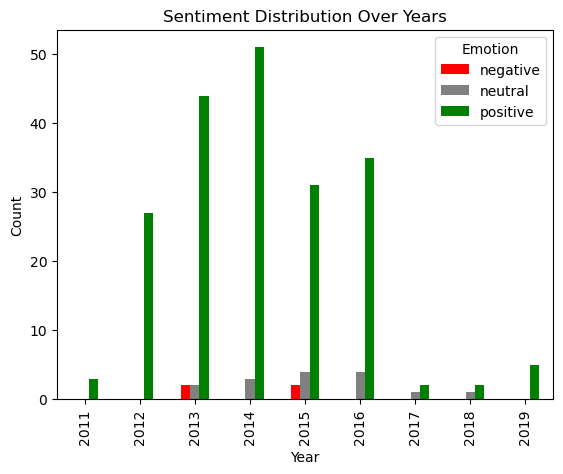


Grouped DataFrame with counts:
    year sentiment  counts
0   2011  positive       1
1   2012   neutral       1
2   2012  positive       4
3   2013  positive       6
4   2014  negative       1
5   2014   neutral       2
6   2014  positive      29
7   2015   neutral       1
8   2015  positive      55
9   2016   neutral       1
10  2016  positive      26
11  2017  positive      24
12  2018   neutral       2
13  2018  positive      17
14  2019  positive      11
15  2020  positive       5
16  2021  positive       7
17  2022   neutral       1
18  2022  positive      12
19  2023  positive       3


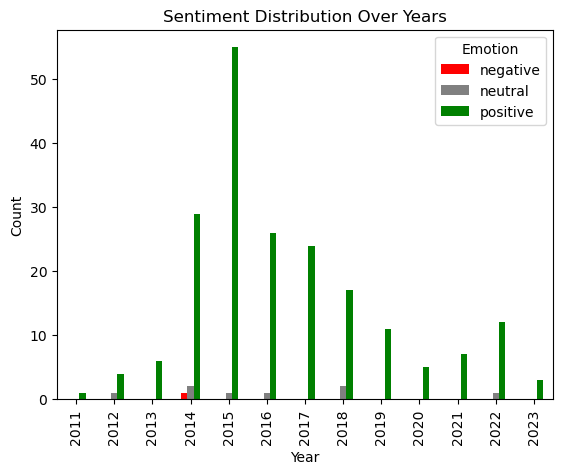

In [40]:
# Define colors for each sentiment
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'grey'}

combined_df_2019['date'] = pd.to_datetime(combined_df_2019['date'])
combined_df_2023['date'] = pd.to_datetime(combined_df_2023['date'])

complete_sentiment_df_2019_cp = combined_df_2019.copy()
complete_sentiment_df_2023_cp = combined_df_2023.copy()

complete_sentiment_df_2019_cp['year'] = complete_sentiment_df_2019_cp['date'].dt.year
complete_sentiment_df_2023_cp['year'] = complete_sentiment_df_2023_cp['date'].dt.year

emotion_counts = complete_sentiment_df_2019_cp.groupby(['year', 'sentiment']).size().reset_index(name='counts')
print("\nGrouped DataFrame with counts:")
print(emotion_counts)

pivot_df = emotion_counts.pivot(index='year', columns='sentiment', values='counts').fillna(0)

# Plot
emotion_counts.pivot(index='year', columns='sentiment', values='counts').fillna(0).plot(
    kind='bar', color=[colors.get(x, 'blue') for x in ['negative', 'neutral', 'positive']])
#pivot_df.plot(kind='bar', stacked=True)

plt.title('Sentiment Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.show()



emotion_counts = complete_sentiment_df_2023_cp.groupby(['year', 'sentiment']).size().reset_index(name='counts')
print("\nGrouped DataFrame with counts:")
print(emotion_counts)

pivot_df = emotion_counts.pivot(index='year', columns='sentiment', values='counts').fillna(0)

# Plot
emotion_counts.pivot(index='year', columns='sentiment', values='counts').fillna(0).plot(
    kind='bar', color=[colors.get(x, 'blue') for x in ['negative', 'neutral', 'positive']])
plt.title('Sentiment Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.show()

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Φόρτωση των αρχείων listings για το 2019
df_listings_2019_april = pd.read_csv(f"data/2019/april/listings.csv", low_memory=False)
df_listings_2019_febrouary = pd.read_csv(f"data/2019/febrouary/listings.csv", low_memory=False)
df_listings_2019_march = pd.read_csv(f"data/2019/march/listings.csv", low_memory=False)

# Συνδυασμός των δεδομένων listings για το 2019
df_listings_2019 = pd.concat([df_listings_2019_april, df_listings_2019_febrouary, df_listings_2019_march], ignore_index=True)

# Φόρτωση των αρχείων listings για το 2023
df_listings_2023_june = pd.read_csv(f"data/2023/june/listings.csv", low_memory=False)
df_listings_2023_march = pd.read_csv(f"data/2023/march/listings.csv", low_memory=False)
df_listings_2023_september = pd.read_csv(f"data/2023/september/listings.csv", low_memory=False)

# Συνδυασμός των δεδομένων listings για το 2023
df_listings_2023 = pd.concat([df_listings_2023_june, df_listings_2023_march, df_listings_2023_september], ignore_index=True)

# Συγχώνευση των δεδομένων σχολίων με τα δεδομένα listings
sampled_df_2019_reviews = pd.merge(sampled_df_2019_reviews, df_listings_2019[['id', 'neighbourhood']], left_on='id', right_on='id', how='left')
sampled_df_2023_reviews = pd.merge(sampled_df_2023_reviews, df_listings_2023[['id', 'neighbourhood']], left_on='id', right_on='id', how='left')

# Δημιουργία ενός DataFrame για τα αρχικά δεδομένα των σχολίων και της ημερομηνίας για το 2019
initial_comments_2019 = pd.DataFrame(fully_sampled_2019_comments_list, columns=['comments'])
initial_comments_2019['date'] = [row['date'] for _, row in sampled_df_2019_reviews.iterrows()]
initial_comments_2019['neighbourhood'] = [row['neighbourhood'] for _, row in sampled_df_2019_reviews.iterrows()]

# Προσθήκη αναγνωριστικού ID στα αρχικά δεδομένα
initial_comments_2019['id'] = initial_comments_2019.index

# Δημιουργία μιας λίστας με τα συναισθήματα από το classifier_res_2019
sentiments_2019 = [max(res, key=lambda x: x['score'])['label'] for res in classifier_res_2019]

# Προσθήκη της στήλης sentiment στο DataFrame
initial_comments_2019['sentiment'] = sentiments_2019

# Δημιουργία του τελικού DataFrame με τις στήλες id, date, comments, neighbourhood, sentiment
final_df_2019 = initial_comments_2019[['id', 'date', 'comments', 'neighbourhood', 'sentiment']]

# Έλεγχος του τελικού DataFrame
print(final_df_2019.head())

# Εκτύπωση του αριθμού των negative, positive και neutral σχολίων
sentiment_counts = final_df_2019['sentiment'].value_counts()
print("Sentiment counts:\n", sentiment_counts)

##############################################################################################################
# Δημιουργία ενός DataFrame για τα αρχικά δεδομένα των σχολίων και της ημερομηνίας για το 2023
initial_comments_2023 = pd.DataFrame(fully_sampled_2023_comments_list, columns=['comments'])
initial_comments_2023['date'] = [row['date'] for _, row in sampled_df_2023_reviews.iterrows()]
initial_comments_2023['neighbourhood'] = [row['neighbourhood'] for _, row in sampled_df_2023_reviews.iterrows()]

# Προσθήκη αναγνωριστικού ID στα αρχικά δεδομένα
initial_comments_2023['id'] = initial_comments_2023.index

# Δημιουργία μιας λίστας με τα συναισθήματα από το classifier_res_2023
sentiments_2023 = [max(res, key=lambda x: x['score'])['label'] for res in classifier_res_2023]

# Προσθήκη της στήλης sentiment στο DataFrame
initial_comments_2023['sentiment'] = sentiments_2023

# Δημιουργία του τελικού DataFrame με τις στήλες id, date, comments, neighbourhood, sentiment
final_df_2023 = initial_comments_2023[['id', 'date', 'comments', 'neighbourhood', 'sentiment']]

# Έλεγχος του τελικού DataFrame
print(final_df_2023.head())

# Εκτύπωση του αριθμού των negative, positive και neutral σχολίων
sentiment_counts = final_df_2023['sentiment'].value_counts()
print("Sentiment counts:\n", sentiment_counts)

# Συνδυασμός των DataFrames για το 2019 και το 2023
combined_df_2019_2023 = pd.concat([final_df_2019, final_df_2023], ignore_index=True)

# Προσθήκη στήλης 'year'
combined_df_2019_2023['year'] = combined_df_2019_2023['date'].apply(lambda x: pd.to_datetime(x).year)

# Δημιουργία γραφημάτων για την κατανομή των συναισθημάτων ανά γειτονιά
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df_2019_2023, x='neighbourhood', hue='sentiment')
plt.title('Sentiment Distribution per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

# Δημιουργία γραφημάτων για την κατανομή των συναισθημάτων ανά γειτονιά για το 2019 και το 2023
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df_2019_2023[combined_df_2019_2023['year'] == 2019], x='neighbourhood', hue='sentiment')
plt.title('Sentiment Distribution per Neighborhood in 2019')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df_2019_2023[combined_df_2019_2023['year'] == 2023], x='neighbourhood', hue='sentiment')
plt.title('Sentiment Distribution per Neighborhood in 2023')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


KeyError: 'neighbourhood'

# **Second Part: ✨Sentiment Analysis**✨

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split


train_df_2019, test_df_2019 = train_test_split(final_df_2019, test_size=0.2, random_state=42)


train_df_2023, test_df_2023 = train_test_split(final_df_2023, test_size=0.2, random_state=42)


print("Train set 2019 shape:", train_df_2019.shape)
print("Test set 2019 shape:", test_df_2019.shape)
print("Train set 2023 shape:", train_df_2023.shape)
print("Test set 2023 shape:", test_df_2023.shape)

print("Train set 2019:\n", train_df_2019.head())
print("Test set 2019:\n", test_df_2019.head())
print("Train set 2023:\n", train_df_2023.head())
print("Test set 2023:\n", test_df_2023.head())

Train set 2019 shape: (240, 4)
Test set 2019 shape: (60, 4)
Train set 2023 shape: (240, 4)
Test set 2023 shape: (60, 4)
Train set 2019:
       id        date                                           comments  \
232  232  2016-01-31  emmanouil accurate quick getting back emails c...   
59    59  2013-01-15  thank fotis much everything done welcome us be...   
6      6  2015-04-20  highly recommend property emmanuel wonderful h...   
185  185  2014-09-26  fotis gracious considerate host greatly apprec...   
173  173  2014-04-08  lovely apartment one huge room nicely decorate...   

    sentiment  
232  positive  
59   positive  
6    positive  
185  positive  
173  positive  
Test set 2019:
       id        date                                           comments  \
203  203  2019-03-31  apartment clean cosy location nice neighbourho...   
266  266  2013-09-11  fotis great host got much later expected met e...   
152  152  2012-09-09  nice place stay good access shopping quiet bed...   


# **Third Part: ✨Similarity (jaccard, cosine, etc) και σημασιολογικές γειτονιές**✨

In [23]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

C:\Users\user/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz


In [25]:
from gensim.models import KeyedVectors

model_path = r'C:\Users\user/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [43]:
from scipy.spatial.distance import cosine

def calculate_word_vector(w, emb_model):
    if w in emb_model:
        return emb_model[w]
    else:
        return np.zeros(emb_model.vector_size)

def calculate_cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

def calculate_similarity(w1, w2, emb_model):
    
    vec1 = calculate_word_vector(w1, emb_model)
    vec2 = calculate_word_vector(w2, emb_model)
    
    return calculate_cosine_similarity(vec1, vec2)

# Example usage
word1 = "king"
word2 = "queen"

similarity = calculate_similarity(word1, word2, model)
print(f"The similarity between '{word1}' and '{word2}' is: {similarity:.4f}")

The similarity between 'king' and 'queen' is: 0.6511


In [44]:
def get_neighborhood(word, model, N):
    
    if word in model:
        return model.most_similar(word, topn=N)
    else:
        return []

def get_combined_neighborhood(word1, word2, model, N):
   
    neighborhood1 = get_neighborhood(word1, model, N)
    neighborhood2 = get_neighborhood(word2, model, N)
    
    combined_neighborhood = neighborhood1 + neighborhood2
    combined_neighborhood = sorted(combined_neighborhood, key=lambda x: x[1], reverse=True)
    
    # Optionally, remove duplicates and keep only top N unique words
    seen = set()
    unique_combined_neighborhood = []
    for word, score in combined_neighborhood:
        if word not in seen:
            seen.add(word)
            unique_combined_neighborhood.append((word, score))
            if len(unique_combined_neighborhood) == N:
                break
    
    return unique_combined_neighborhood

word1 = "king"
word2 = "queen"
N = 2

# Get the combined semantic neighborhood
combined_neighborhood = get_combined_neighborhood(word1, word2, model, N)

# Print the results
print("Combined Semantic Neighborhood for '{}' and '{}':".format(word1, word2))
for word, similarity in combined_neighborhood:
    print(f"{word}: {similarity:.4f}")

Combined Semantic Neighborhood for 'king' and 'queen':
queens: 0.7399
kings: 0.7138


In [45]:
def calculate_neighborhood(word, emb_model, N):
  
    if word in emb_model:
        return emb_model.most_similar(word, topn=N)
    else:
        return []

def calculate_similarity(word1, word2, emb_model):
   
    if word1 in emb_model and word2 in emb_model:
        return emb_model.similarity(word1, word2)
    else:
        return 0.0

def calculate_max_similarity(nei1, nei2, emb_model):
   
    max_similarity = 0.0
    for word1, _ in nei1:
        for word2, _ in nei2:
            similarity = calculate_similarity(word1, word2, emb_model)
            if similarity > max_similarity:
                max_similarity = similarity
    return max_similarity

def correlation_of_similarities(nei1, nei2):
    
    sims1 = [similarity for _, similarity in nei1]
    sims2 = [similarity for _, similarity in nei2]
    if len(sims1) != len(sims2):
        return 0.0
    correlation = np.corrcoef(sims1, sims2)[0, 1]
    return correlation

def sum_of_squared_similarities(nei1, nei2, emb_model):
   
    sum_squared_sim = 0.0
    for word1, _ in nei1:
        for word2, _ in nei2:
            sim = calculate_similarity(word1, word2, emb_model)
            sum_squared_sim += sim ** 2
    return sum_squared_sim


# Words to find the semantic neighborhood for
word1 = "king"
word2 = "queen"
word3 = "man"
N = 10

# Get the neighborhoods
neighborhood1 = calculate_neighborhood(word1, model, N)
neighborhood2 = get_neighborhood(word2, model, N)
neighborhood3 = get_neighborhood(word3, model, N)

# Calculate the similarities
max_similarityy = calculate_max_similarity(neighborhood1, neighborhood2, model)
correlation_similarityy = correlation_of_similarities(neighborhood1, neighborhood2)
sum_squared_similarityy = sum_of_squared_similarities(neighborhood1, neighborhood2, model)

print(f"Max similarity between neighborhoods of '{word1}' and '{word2}': {max_similarityy:.4f}")
print(f"Correlation of similarities between neighborhoods of '{word1}' and '{word2}': {correlation_similarityy:.4f}")
print(f"Sum of squared similarities between neighborhoods of '{word1}' and '{word2}': {sum_squared_similarityy:.4f}")


Max similarity between neighborhoods of 'king' and 'queen': 1.0000
Correlation of similarities between neighborhoods of 'king' and 'queen': 0.9674
Sum of squared similarities between neighborhoods of 'king' and 'queen': 24.9703
